<a href="https://colab.research.google.com/github/JuanPedroDelCastillo/FisicaComputacional1/blob/master/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 4**

Primero debemos **ejecutar la siguiente celda** para importar las bibliotecas utilizadas en los programas.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importación y edición del Dataframe

In [4]:
#Para importar el archivo csv tenemos que poner el link de github, en el cual se tiene que abrir en forma raw
url = "https://raw.githubusercontent.com/JuanPedroDelCastillo/FisicaComputacional1/master/Actividad3/26139.txt"

#Hacemos una lista de los encabezados
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']

#Creamos la lista con el comando pd.read_cvs()
#encoding 'cp1251' para poder usar símbolos en español
#sep = '\+' sirve para separar los datos con espacio
#skiprows sirve para saltarse renglones, hasta nuestra dataframe de interés
#skipfooter es para saltar renglones del final
#engine python para manipularlo en python
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Primero realizamos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

#Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

#Usando el comando pd.to_numeric convertimos los objetos a variables reales
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

#Antes de comenzar con nuevos pasos, es importante realizar una copia de
#seguridad para nuestra información
df_work2 = df_work1.copy()
df_work2['Fecha'].head()

#Usamos dayfirst para que utilice el formato español de las fechas
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

#dt.year hace referencia al año de una variable datetime64.
df_work2['Año'] = df_work2['Fecha'].dt.year

#dt.month hace referencia al mes de una variable datetime64.
df_work2['Mes'] = df_work2['Fecha'].dt.month

#Realizamos una copia del Dataframe para el Análisis Exploratorio.
df_meteo = df_work2.copy()

#Cambiamos la columna de mes de formato numérico a caracteres.
df_meteo.drop("Mes", axis=1, inplace=True)
df_meteo["Mes"] = df_meteo["Fecha"].dt.strftime("%b")

df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19301 entries, 0 to 19300
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   19301 non-null  datetime64[ns]
 1   Precip  19291 non-null  float64       
 2   Evap    10285 non-null  float64       
 3   Tmax    19121 non-null  float64       
 4   Tmin    19138 non-null  float64       
 5   Año     19301 non-null  int64         
 6   Mes     19301 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.0+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1961-01-01     0.0   1.6  23.0   7.0  1961  Jan
1 1961-01-02     0.0   2.1  25.0   5.0  1961  Jan
2 1961-01-03     0.0   4.5  26.0   7.0  1961  Jan
3 1961-01-04     0.0   2.5  26.5   8.0  1961  Jan
4 1961-01-05    20.0   4.6  27.0   7.5  1961  Jan
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
19296 2018-02-25     0.0   NaN   NaN   NaN  2018  Feb
19297 2

## Gráficas de Precipitación, Temperatura Máxima, Temperatura Mínima y Evaporación

### Precipitación

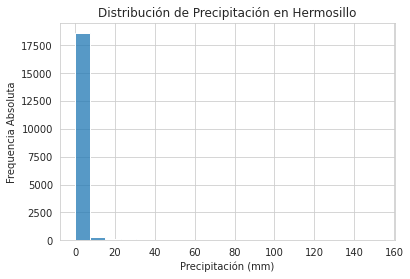

In [5]:
#Gráfica de Precipitación:

sns.set_style('whitegrid') 
plt.xlabel('Precipitación (mm)') 
plt.ylabel('Frequencia Absoluta') 
plt.title('Distribución de Precipitación en Hermosillo') 
sns.histplot(data=df_meteo, x='Precip', bins=20);

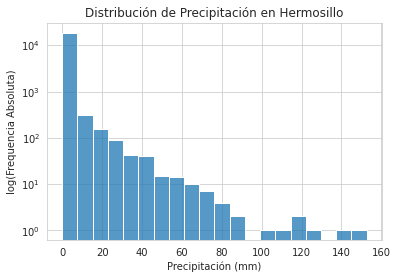

In [6]:
#Gráfica de Precipitación con escala logarítmica en eje y:

sns.set_style('whitegrid') 
plt.xlabel('Precipitación (mm)') 
plt.ylabel('log(Frequencia Absoluta)') 
plt.title('Distribución de Precipitación en Hermosillo') 
sns.histplot(data=df_meteo, x='Precip', bins=20, log_scale=(False,True));

### Temperatura Máxima

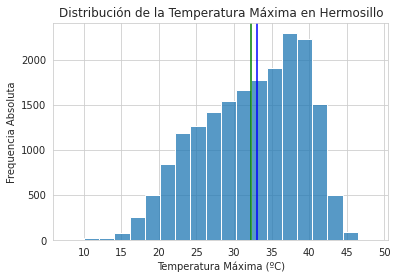

In [7]:
#Gráfica para la Temperatura Máxima
sns.set_style("whitegrid")

#Definimos el promedio y la mediana
Tmaxmed = df_meteo.Tmax.median() 
Tmaxprom = df_meteo.Tmax.mean()

sns.histplot(data=df_meteo, x='Tmax', bins=20);

#Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Tmaxmed, color = 'b', label = 'm') 
plt.axvline(x = Tmaxprom, color = 'g', label = 'x')

plt.xlabel('Temperatura Máxima (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Hermosillo')

plt.show()


### Temperatura Mínima

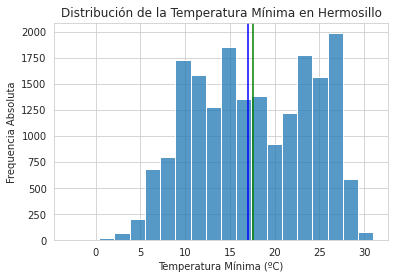

In [8]:
#Gráfica para la Temperatura Mínima
sns.set_style("whitegrid")

#Definimos el promedio y la mediana
Tminmed = df_meteo.Tmin.median() 
Tminprom = df_meteo.Tmin.mean()

#Líneas verticales ubicadas en la mediana y promedio
sns.histplot(data=df_meteo, x='Tmin', bins=20);
plt.axvline(Tminmed, color = 'b'); 
plt.axvline(Tminprom, color = 'g');

plt.xlabel('Temperatura Mínima (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en Hermosillo')

plt.show()

### Evaporación

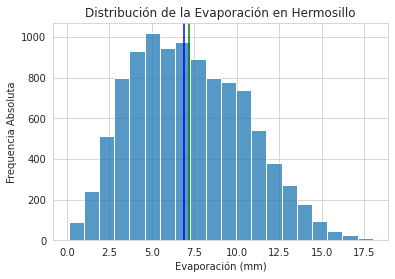

In [9]:
#Gráfica para la Evaporación
sns.set_style("whitegrid")

#Definimos el promedio y la mediana
Emed = df_meteo.Evap.median() 
Eprom = df_meteo.Evap.mean()

#Líneas verticales ubicadas en la mediana y promedio
sns.histplot(data=df_meteo, x='Evap', bins=20);
plt.axvline(Emed, color = 'b'); 
plt.axvline(Eprom, color = 'g');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Evaporación en Hermosillo')

plt.show()

## Gráficas de función de distribución de probabilidad

### Precipitación 

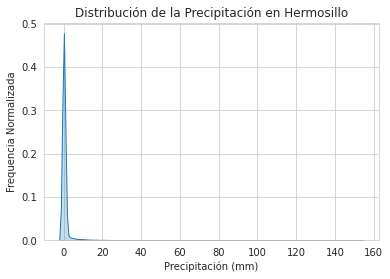

In [10]:
#Gráfica de KDE (Kernel Density Estimate) para la precipitación
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Precip, fill=True);

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en Hermosillo')

plt.show()

### Temperatura Máxima

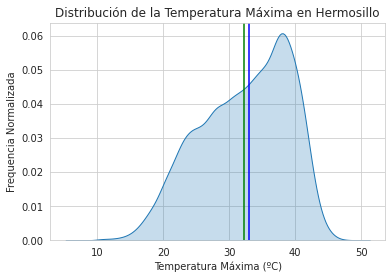

In [11]:
#Gráfica de KDE (Kernel Density Estimate) para la Temperatura Máxima
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Tmax, fill=True);
plt.axvline(Tmaxmed, color = 'b'); 
plt.axvline(Tmaxprom, color = 'g');

plt.xlabel('Temperatura Máxima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Hermosillo')

plt.show()

### Temperatura Mínima

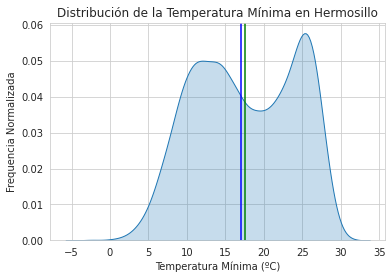

In [12]:
#Gráfica de KDE (Kernel Density Estimate) para la Temperatura Mínima
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Tmin, fill=True);
plt.axvline(Tminmed, color = 'b'); 
plt.axvline(Tminprom, color = 'g');

plt.xlabel('Temperatura Mínima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Hermosillo')

plt.show()

### Evaporación

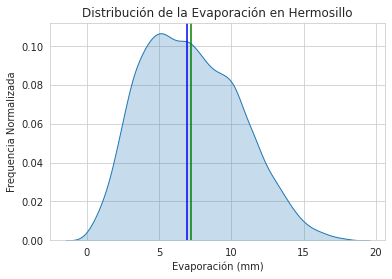

In [13]:
#Gráfica de KDE (Kernel Density Estimate) para la Evaporación
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Evap, fill=True);
plt.axvline(Emed, color = 'b'); 
plt.axvline(Eprom, color = 'g');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en Hermosillo')

plt.show()

## Gráficas de Cajas (Boxplots)

### Temperatura Máxima

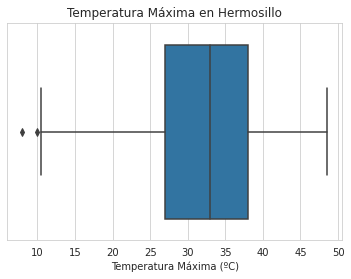

In [14]:
#Gráfica de Cajas (BoxPlots) para Temperatura Máxima
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura Máxima (ºC)', 
    title='Temperatura Máxima en Hermosillo');
plt.show()

### Temperatura Mínima

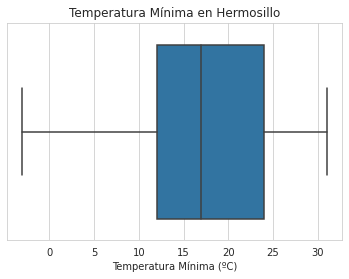

In [15]:
#Gráfica de Cajas (BoxPlots) para Temperatura Mínima
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h').set(xlabel='Temperatura Mínima (ºC)', 
    title='Temperatura Mínima en Hermosillo');
plt.show()

### Evaporación

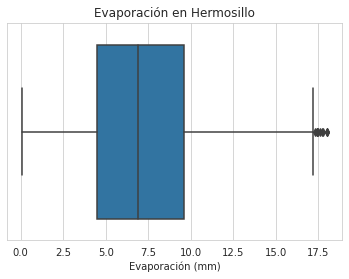

In [16]:
#Gráfica de Cajas (BoxPlots) para Evaporación
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Evap, data=df_meteo, orient='h').set(xlabel='Evaporación (mm)', 
    title='Evaporación en Hermosillo');
plt.show()

## Gráficas de barras de la Precipitación en Hermosillo (en años y meses).

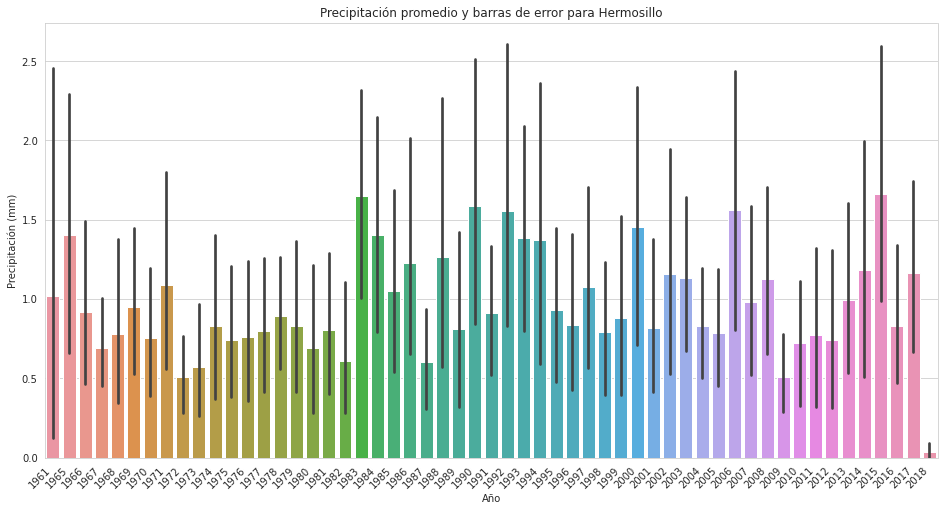

In [5]:
#Gráfica de las precipitaciones del periodo comprendido entre 1961 y 2018.
sns.set_style('whitegrid')

plt.figure(figsize=(16,8))
g=sns.barplot(data=df_meteo, x='Año', y='Precip')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('Año')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio y barras de error para Hermosillo')
plt.show()

           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0     1961-01-01     0.0   1.6  23.0   7.0  1961  Jan
1     1961-01-02     0.0   2.1  25.0   5.0  1961  Jan
2     1961-01-03     0.0   4.5  26.0   7.0  1961  Jan
3     1961-01-04     0.0   2.5  26.5   8.0  1961  Jan
4     1961-01-05    20.0   4.6  27.0   7.5  1961  Jan
...          ...     ...   ...   ...   ...   ...  ...
19296 2018-02-25     0.0   NaN   NaN   NaN  2018  Feb
19297 2018-02-26     0.0   NaN   NaN   NaN  2018  Feb
19298 2018-02-27     0.0   NaN   NaN   NaN  2018  Feb
19299 2018-02-28     0.0   NaN   NaN   NaN  2018  Feb
19300 2018-03-01     0.0   NaN   NaN   NaN  2018  Mar

[19301 rows x 7 columns]


Text(0.5, 1.0, 'Precipitación promedio y barras de error por mes del año en Hermosillo')

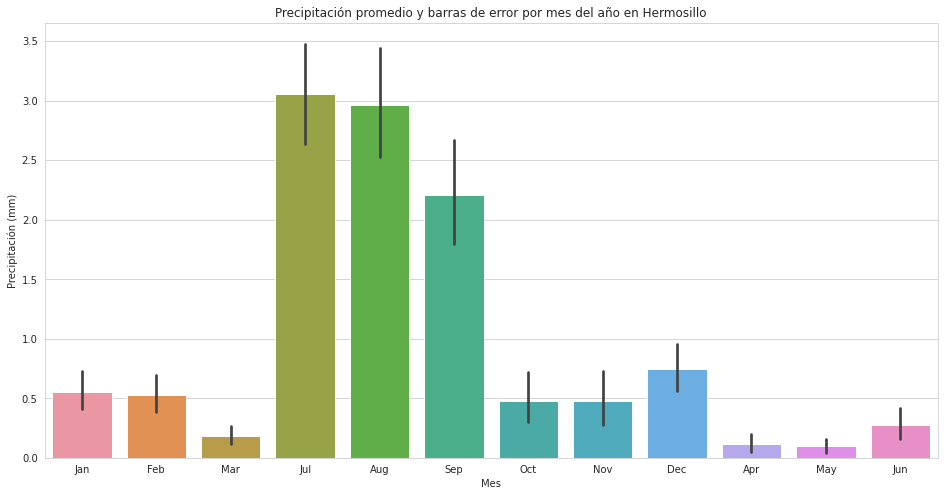

In [7]:
#Gráfica de Precipitación últimos 30 años agrupado por mes

#convertimos números de meses a nombres
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes']=df_meteo['Fecha'].dt.strftime('%b')
print(df_meteo)

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
j=sns.barplot(data=df_meteo, x='Mes', y='Precip')

plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio y barras de error por mes del año en Hermosillo')

## Gráficas de línea: Precipitación, Temperaturas Máxima y Mínima (Últimos 30 Años)

In [8]:
#Datos de los últimos 30 años (1987-2017)
df_30=df_meteo[(df_meteo['Año']>=1987)&(df_meteo['Año']<2017)]

### Precipitación

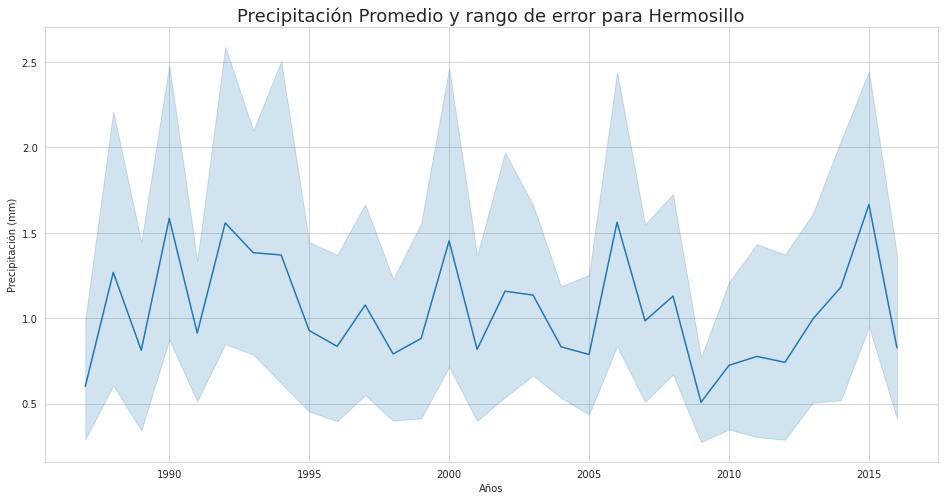

In [11]:
#Gráfica de Precipitación últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_30);

#Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Hermosillo', fontsize=18)

plt.show()

### Temperaturas Máxima y Mínima

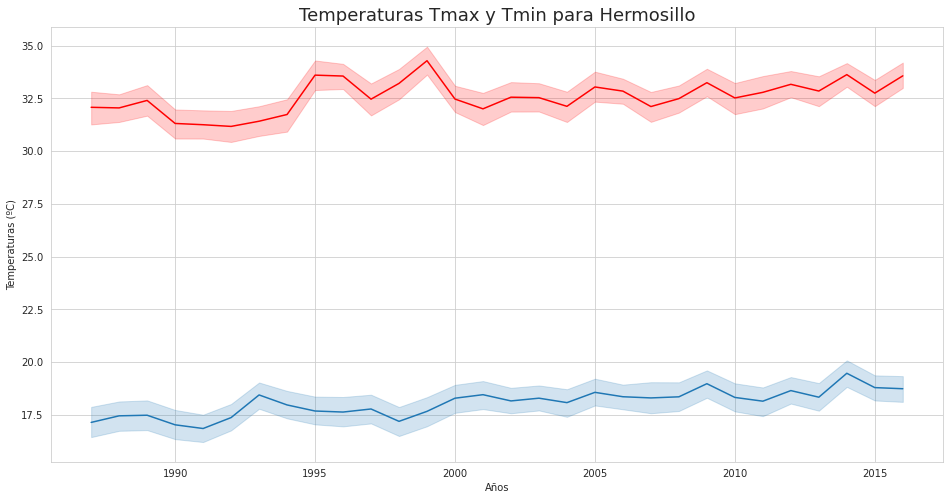

In [12]:
#Gráfica de Temperaturas de últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_30, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_30);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Hermosillo', fontsize=18)

plt.show()

# Diagramas de cajas

### Temperatura Máxima

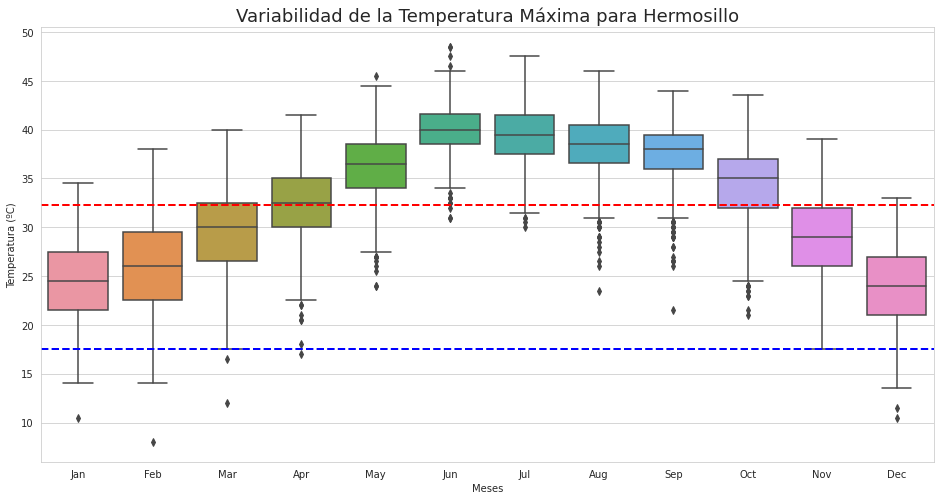

mean(Tmax) =  32.298551330997334
mean(Tmin) =  17.5542115163549
Diff Tmax_ave-Tmin_ave =  14.744339814642434


In [13]:
#Gráfica de Temepraturas Máximas en los últimos 30 años agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

#Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

#Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_30);

#Línea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

#Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Hermosillo', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

### Temperatura Mínima

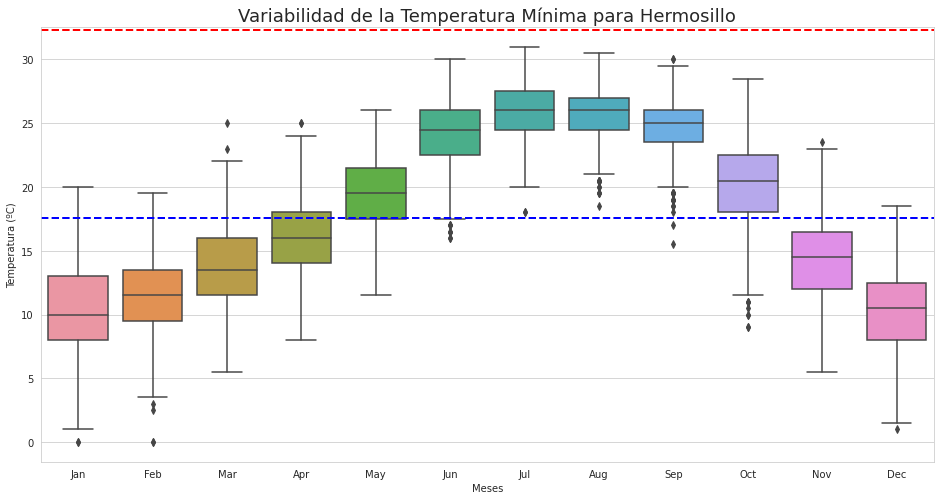

mean(Tmax) =  32.298551330997334
mean(Tmin) =  17.5542115163549
Diff Tmax_ave-Tmin_ave =  14.744339814642434


In [14]:
#Gráfica de Temperaturas Mínimas en los últimos 30 años agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

#Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

#Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_30);

#Línea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

#Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Hermosillo', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

### Evaporación

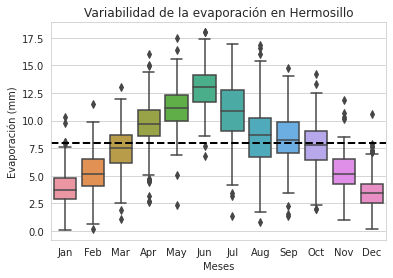

In [16]:
##Gráfica de Evaporación en los últimos 30 años agrupado por Mes
sns.set_style('whitegrid')
EvMean=df_30['Evap'].mean()

#Creación y configuración del gráfico
k=sns.boxplot(x='Mes', y='Evap', data=df_30)
plt.axhline(EvMean, color='black', linestyle='--', linewidth=2)

plt.xlabel('Meses')
plt.ylabel('Evaporación (mm)')
plt.title('Variabilidad de la evaporación en Hermosillo')
plt.show()